/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

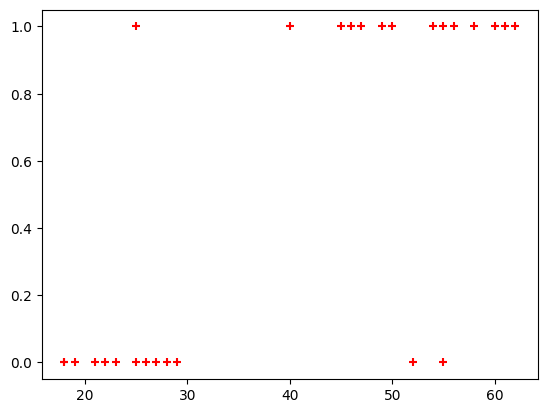

In [2]:
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("/insurance_data (1).csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the CSV data into a pandas DataFrame
data = pd.read_csv('/HR_comma_sep (1).csv')  # Replace with your CSV file path

# Step 2: Preprocess the data
# Example: Assuming the CSV has columns 'feature1', 'feature2', ..., 'target'
# Handle missing values (if necessary)
data = data.dropna()  # This drops rows with missing values, adjust as necessary

# Step 3: Define features (X) and target (y)
X = data[['average_montly_hours', 'promotion_last_5years']]  # Replace with your actual feature columns
y = data['satisfaction_level']  # Replace with your target column

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build the linear regression model
model = LinearRegression()

# Step 6: Train the model on the training data
model.fit(X_train, y_train)

# Step 7: Predict using the test data
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally: Print coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Mean Squared Error: 0.06104764626160889
R-squared: 0.0009228914354508788
Model coefficients: [-0.000118    0.03756317]
Model intercept: 0.6356355420226842


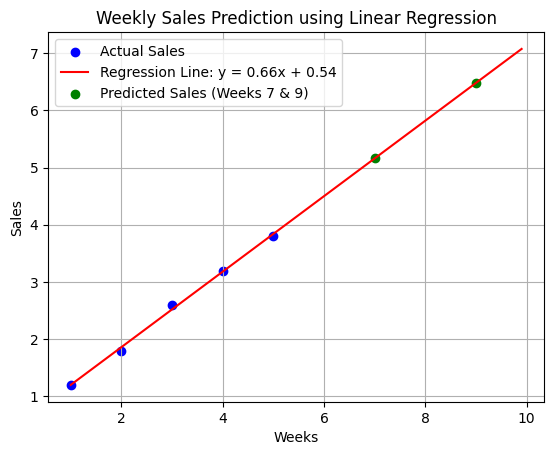

Equation of the regression line: y = 0.66x + 0.54
Predicted sales for week 7: 5.16
Predicted sales for week 9: 6.48


In [6]:
#SIMPLE LINEAR REGRESSION
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
xi = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for sklearn
yi = np.array([1.2, 1.8, 2.6, 3.2, 3.8])

# Train the linear regression model
model = LinearRegression()
model.fit(xi, yi)

# Get the slope (m) and intercept (c)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# Predict sales for weeks 7 and 9
future_weeks = np.array([7, 9]).reshape(-1, 1)
predicted_sales = model.predict(future_weeks)

# Generate line for visualization
x_range = np.arange(1, 10, 0.1).reshape(-1, 1)
y_range = model.predict(x_range)

# Plot data points and regression line
plt.scatter(xi, yi, color='blue', label="Actual Sales")
plt.plot(x_range, y_range, color='red', label=f"Regression Line: y = {m:.2f}x + {c:.2f}")
plt.scatter(future_weeks, predicted_sales, color='green', marker='o', label="Predicted Sales (Weeks 7 & 9)")

# Labels and title
plt.xlabel("Weeks")
plt.ylabel("Sales")
plt.title("Weekly Sales Prediction using Linear Regression")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print equation and predicted sales
print(f"Equation of the regression line: y = {m:.2f}x + {c:.2f}")
print(f"Predicted sales for week 7: {predicted_sales[0]:.2f}")
print(f"Predicted sales for week 9: {predicted_sales[1]:.2f}")


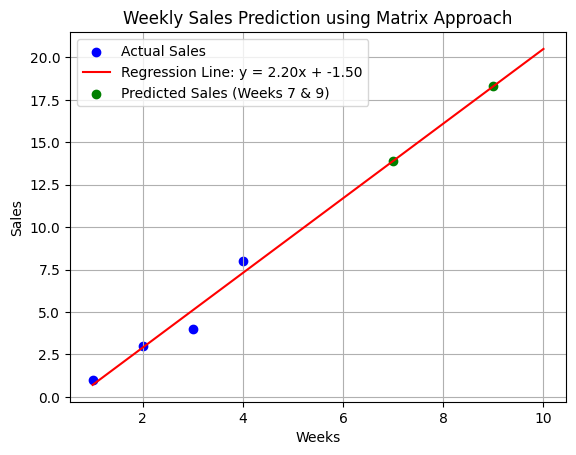

Equation of the regression line: y = 2.20x + -1.50
Predicted sales for week 7: 13.90
Predicted sales for week 9: 18.30


In [7]:
#LINEAR REGRESSION IN MATRIX FORM
import numpy as np
import matplotlib.pyplot as plt

# Given data
xi = np.array([1, 2, 3, 4])  # Independent variable (weeks)
yi = np.array([1,3,4,8])  # Dependent variable (sales)

# Convert to matrix form: Add a column of ones for the intercept term
X = np.c_[np.ones(len(xi)), xi]  # Shape: (5,2), first column is 1 for intercept
Y = yi.reshape(-1, 1)  # Shape: (5,1)

# Compute theta using the Normal Equation: θ = (X^T X)^(-1) X^T Y
theta = np.linalg.inv(X.T @ X) @ X.T @ Y  # Matrix multiplication

# Extract slope (m) and intercept (c)
c, m = theta.flatten()  # Convert matrix to scalars

# Predict sales for weeks 7 and 9
future_weeks = np.array([1, 7, 9])  # Include 1 for intercept calculation
X_future = np.c_[np.ones(len(future_weeks)), future_weeks]
predicted_sales = X_future @ theta  # Matrix multiplication

# Generate regression line
x_range = np.linspace(1, 10, 100)  # Smooth range for plotting
y_range = c + m * x_range  # Compute y values

# Plot data points and regression line
plt.scatter(xi, yi, color='blue', label="Actual Sales")
plt.plot(x_range, y_range, color='red', label=f"Regression Line: y = {m:.2f}x + {c:.2f}")
plt.scatter([7, 9], predicted_sales[1:], color='green', marker='o', label="Predicted Sales (Weeks 7 & 9)")

# Labels and title
plt.xlabel("Weeks")
plt.ylabel("Sales")
plt.title("Weekly Sales Prediction using Matrix Approach")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print equation and predicted sales
print(f"Equation of the regression line: y = {m:.2f}x + {c:.2f}")
print(f"Predicted sales for week 7: {predicted_sales[1][0]:.2f}")
print(f"Predicted sales for week 9: {predicted_sales[2][0]:.2f}")
